# Previsão dos preços da habitação em Boston

Neste estudo, daremos uma olhada no conjunto de dados Boston Housing Prices no Kaggle. Esse conjunto de dados é proveniente do UCI Machine Learning Repository e contém 506 linhas e 14 colunas. Cada linha representa uma casa localizada em Boston, Massachusetts em 1978 e as 14 colunas representam pontos de dados coletados em cada casa. O objetivo deste estudo é usar os dados coletados sobre cada residência para prever o valor médio da residência. Esta é uma tarefa de regressão supervisionada, que significa:

- Supervisionado - A variável de destino está incluída no conjunto de dados.
- Regressão - A variável de destino é contínua.

Visão geral das features de conjunto de dados. Esta lista inclui uma descrição de todas as colunas no conjunto de dados.

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terrenos residenciais divididos por lotes acima de 25.000 pés quadrados
- INDUS - proporção de acres comerciais em áreas não comerciais por cidade
- CHAS - variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
- NOX - concentração de óxidos nítricos (partes por 10 milhões)
- RM - número médio de quartos por habitação
- AGE - proporção de unidades ocupadas pelos proprietários construídas antes de 1940
- DIS - distâncias ponderadas a cinco centros de emprego em Boston
- RAD - índice de acessibilidade às rodovias radiais
- TAX - taxa de imposto sobre a propriedade de valor total por USD 10,000 
- PTRATIO - Relação aluno-professor por cidade
- B - 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade
- LSTAT - porcentagem de Status de classe inferior da população
- MEDV (TARGET) - Valor médio das casas ocupadas pelos proprietários nos anos em USD 1,000

In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# lendo e verificando os dados

column_headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', \
                  'PTRATIO', 'B', 'LSTAT', 'MEDV']
%time boston = pd.read_csv("/Users/consumoteca/Desktop/python/dados/housing.csv",header=None, delimiter="\s+", names = column_headers)
boston.head()

Wall time: 69.6 ms


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston['ZN'].min()

0.0

In [6]:
boston['ZN'].max()

100.0

In [7]:
boston['ZN'].mean()

11.363636363636363

In [8]:
boston['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

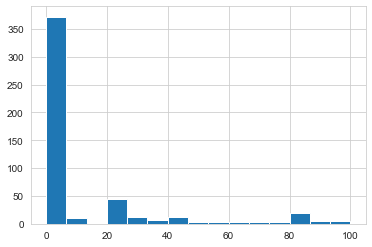

In [9]:
boston['ZN'].hist(bins=15)

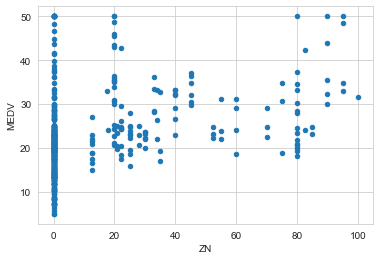

In [10]:
boston.plot(kind='scatter', x='ZN', y='MEDV')
plt.show()

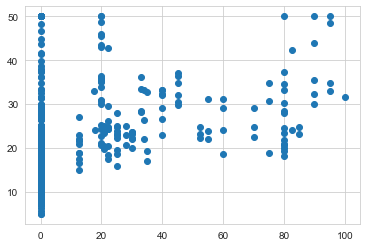

In [11]:
plt.scatter(boston['ZN'],boston['MEDV'])

In [12]:
#A partir do gráfico, há indícios que a proporção de casas acima de 25k sqf em relação ao tamanho do bairro, em sqf, influencia no preço da casa
#Bairros com mais terrenos acima de 25k sqf e que ocupam uma proporção maior do bairro, tendem a ser mais caros 

In [13]:
boston['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [14]:
boston['RAD'].value_counts().sort_values()

7      17
1      20
8      24
2      24
6      26
3      38
4     110
5     115
24    132
Name: RAD, dtype: int64

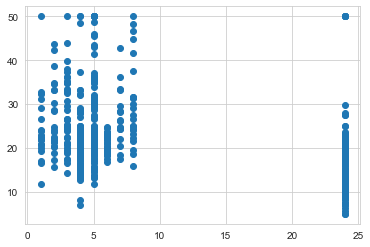

In [15]:
plt.scatter(boston['RAD'],boston['MEDV'])

In [16]:
boston['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

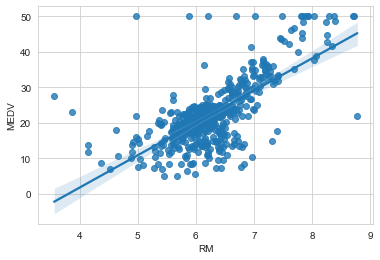

In [17]:
sns.regplot(boston['RM'],boston['MEDV'])


In [18]:
# kkhjhkj

In [23]:
function = 'MEDV~RM'

function1 = 'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+TAX+RAD+PTRATIO+B+LSTAT'

function2 = 'MEDV~CRIM+ZN+CHAS+NOX+RM+DIS+TAX+RAD+PTRATIO+B+LSTAT'

In [25]:
# regressão com numero de quartos
model = smf.ols(formula=function, data=boston).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        00:36:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [26]:
# regressão com todas as variaveis
model1 = smf.ols(formula=function1, data=boston).fit() 
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        00:36:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [27]:
# regressão apenas com as variaveis estatisticamentes significativas
model2 = smf.ols(formula=function2, data=boston).fit() 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.54e-137
Time:                        00:36:57   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0